In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [86]:
df = pd.read_csv("student-por.csv")

In [87]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [88]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


<AxesSubplot:xlabel='G3', ylabel='Count'>

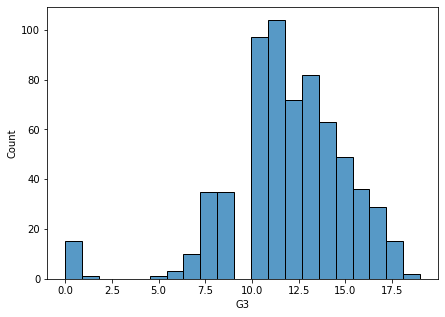

In [89]:
plt.figure(figsize=(7,5))
sbn.histplot(df["G3"])

In [90]:
df.sort_values("G3",ascending=True).head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
586,MS,F,17,U,GT3,T,4,2,teacher,services,...,5,5,5,1,3,5,0,8,8,0
567,MS,M,18,R,GT3,T,3,2,services,other,...,2,3,1,2,2,5,0,4,0,0
610,MS,F,19,R,GT3,A,1,1,at_home,at_home,...,3,5,4,1,4,1,0,8,0,0
163,GP,M,18,U,LE3,T,1,1,other,other,...,2,3,5,2,5,4,0,11,9,0
603,MS,F,18,R,LE3,A,4,2,teacher,other,...,5,3,1,1,1,5,0,5,0,0


In [91]:
len(df) * 0.03

19.47

In [92]:
df = df.sort_values("G3",ascending=True).iloc[19:]

In [93]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [94]:
df.corr()["G3"].sort_values()

failures     -0.368631
absences     -0.201262
Dalc         -0.170478
Walc         -0.157827
traveltime   -0.140724
freetime     -0.101311
health       -0.098261
goout        -0.094825
age          -0.016449
famrel        0.079668
Fedu          0.204253
studytime     0.255428
Medu          0.288352
G1            0.872978
G2            0.943477
G3            1.000000
Name: G3, dtype: float64

In [95]:
df["studytime"].max()

4

In [96]:
df["studytime"].min()

1

In [97]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
155,GP,M,17,U,GT3,T,2,1,other,other,...,5,4,5,1,2,5,22,9,7,6
582,MS,F,19,U,LE3,A,1,1,at_home,other,...,1,4,4,1,1,5,0,6,8,7
590,MS,F,18,U,GT3,T,1,1,other,other,...,3,4,4,2,2,5,3,7,8,7
500,MS,M,17,U,GT3,T,1,2,other,other,...,5,3,5,5,5,1,12,6,7,7
572,MS,F,16,U,GT3,A,3,2,services,at_home,...,2,5,5,1,1,1,8,5,5,7


In [98]:
dropColumns = ["school","sex","address","famsize","Pstatus","Mjob","Fjob","reason","guardian","schoolsup","famsup","paid","activities","nursery","higher","internet","romantic"]
df = df.drop(columns=dropColumns,axis = 1)

In [99]:
df.head()

## Sayısal olmayan değerler çıkarıldı

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
155,17,2,1,1,1,0,5,4,5,1,2,5,22,9,7,6
582,19,1,1,1,1,0,1,4,4,1,1,5,0,6,8,7
590,18,1,1,3,2,2,3,4,4,2,2,5,3,7,8,7
500,17,1,2,1,1,1,5,3,5,5,5,1,12,6,7,7
572,16,3,2,2,2,2,2,5,5,1,1,1,8,5,5,7


### TRAIN - TEST

In [118]:
y = df["G3"].values
x = df.drop("G3",axis=1).values

In [119]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [120]:
scaler = MinMaxScaler()

In [121]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [125]:
x_train.shape

(441, 15)

##### LAYERS YSA

In [126]:
model = Sequential()

model.add(Dense(10,activation="relu"))
model.add(Dense(10,activation="relu"))
model.add(Dense(10,activation="relu"))

model.add(Dense(1))

model.compile(optimizer="adam",loss="mse")

In [127]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=200)

Epoch 1/200
14/14 [==============================] - 3s 47ms/step - loss: 154.4679 - val_loss: 144.2234
Epoch 2/200
14/14 [==============================] - 0s 10ms/step - loss: 148.1893 - val_loss: 138.0441
Epoch 3/200
14/14 [==============================] - 0s 9ms/step - loss: 141.5561 - val_loss: 130.9191
Epoch 4/200
14/14 [==============================] - 0s 10ms/step - loss: 133.3423 - val_loss: 121.9183
Epoch 5/200
14/14 [==============================] - 0s 9ms/step - loss: 123.5361 - val_loss: 111.3487
Epoch 6/200
14/14 [==============================] - 0s 10ms/step - loss: 111.2481 - val_loss: 96.9343
Epoch 7/200
14/14 [==============================] - 0s 10ms/step - loss: 93.7068 - val_loss: 76.3240
Epoch 8/200
14/14 [==============================] - 0s 10ms/step - loss: 69.9532 - val_loss: 51.2480
Epoch 9/200
14/14 [==============================] - 0s 10ms/step - loss: 44.2806 - val_loss: 27.5654
Epoch 10/200
14/14 [==============================] - 0s 10ms/step - loss

14/14 [==============================] - 0s 9ms/step - loss: 0.8101 - val_loss: 0.9745
Epoch 83/200
14/14 [==============================] - 0s 9ms/step - loss: 0.8040 - val_loss: 0.9588
Epoch 84/200
14/14 [==============================] - 0s 10ms/step - loss: 0.7938 - val_loss: 0.9517
Epoch 85/200
14/14 [==============================] - 0s 10ms/step - loss: 0.7839 - val_loss: 0.9419
Epoch 86/200
14/14 [==============================] - 0s 10ms/step - loss: 0.7772 - val_loss: 0.9491
Epoch 87/200
14/14 [==============================] - 0s 10ms/step - loss: 0.7682 - val_loss: 0.9355
Epoch 88/200
14/14 [==============================] - 0s 10ms/step - loss: 0.7563 - val_loss: 0.9284
Epoch 89/200
14/14 [==============================] - 0s 10ms/step - loss: 0.7482 - val_loss: 0.9225
Epoch 90/200
14/14 [==============================] - 0s 10ms/step - loss: 0.7491 - val_loss: 0.9174
Epoch 91/200
14/14 [==============================] - 0s 10ms/step - loss: 0.7391 - val_loss: 0.9095
Epoch

Epoch 163/200
14/14 [==============================] - 0s 9ms/step - loss: 0.6149 - val_loss: 0.8380
Epoch 164/200
14/14 [==============================] - 0s 10ms/step - loss: 0.6188 - val_loss: 0.8424
Epoch 165/200
14/14 [==============================] - 0s 10ms/step - loss: 0.6228 - val_loss: 0.8696
Epoch 166/200
14/14 [==============================] - 0s 9ms/step - loss: 0.6247 - val_loss: 0.8415
Epoch 167/200
14/14 [==============================] - 0s 9ms/step - loss: 0.6099 - val_loss: 0.8447
Epoch 168/200
14/14 [==============================] - 0s 10ms/step - loss: 0.6183 - val_loss: 0.8516
Epoch 169/200
14/14 [==============================] - 0s 9ms/step - loss: 0.6350 - val_loss: 0.8380
Epoch 170/200
14/14 [==============================] - 0s 9ms/step - loss: 0.6317 - val_loss: 0.8491
Epoch 171/200
14/14 [==============================] - 0s 10ms/step - loss: 0.6117 - val_loss: 0.8386
Epoch 172/200
14/14 [==============================] - 0s 10ms/step - loss: 0.6086 - va

In [128]:
lossValue = pd.DataFrame(model.history.history)

<AxesSubplot:>

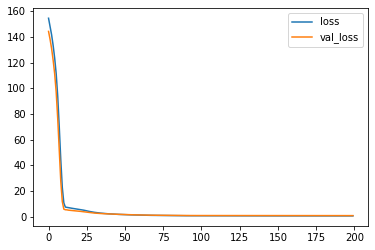

In [130]:
lossValue.plot()

In [131]:
lossValue.head()

,loss,val_loss
0,154.467880,144.223450
1,148.189301,138.044052
2,141.556076,130.919098
3,133.342346,121.918289
4,123.536087,111.348686


In [132]:
predict_val = model.predict(x_test)
predict_val

6/6 [==============================] - 0s 3ms/step


array([[13.342433 ],
       [11.692107 ],
       [16.015333 ],
       [11.150245 ],
       [16.842293 ],
       [15.262631 ],
       [17.63038  ],
       [10.046496 ],
       [15.486555 ],
       [ 9.98241  ],
       [11.3535795],
       [ 7.783482 ],
       [ 9.434157 ],
       [10.4171095],
       [13.755078 ],
       [ 9.049846 ],
       [ 7.9598126],
       [13.716938 ],
       [10.883935 ],
       [18.403458 ],
       [ 9.933953 ],
       [10.034026 ],
       [ 7.272662 ],
       [18.026093 ],
       [13.568074 ],
       [10.220492 ],
       [ 9.739354 ],
       [14.746776 ],
       [17.085766 ],
       [13.318257 ],
       [ 9.789562 ],
       [10.53476  ],
       [11.269525 ],
       [10.338119 ],
       [ 9.360509 ],
       [11.953309 ],
       [13.181941 ],
       [17.420622 ],
       [12.502859 ],
       [13.246136 ],
       [13.27167  ],
       [ 7.788074 ],
       [11.158168 ],
       [12.525334 ],
       [12.869938 ],
       [ 9.923779 ],
       [12.185065 ],
       [10.04

In [133]:
mean_absolute_error(y_test,predict_val)

0.6253159285853149

In [135]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,630.000000,630.00000,630.000000,630.000000,630.00000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000
mean,16.707937,2.51746,2.322222,1.566667,1.94127,0.200000,3.930159,3.166667,3.176190,1.477778,2.255556,3.526984,3.741270,11.528571,11.777778,12.236508
std,1.196351,1.13431,1.100360,0.750940,0.82953,0.565011,0.946021,1.045469,1.157984,0.892638,1.270839,1.445920,4.660975,2.664310,2.617323,2.624260
min,15.000000,0.00000,0.000000,1.000000,1.00000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,5.000000,6.000000
25%,16.000000,2.00000,1.000000,1.000000,1.00000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.00000,2.000000,1.000000,2.00000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,12.000000,12.000000
75%,18.000000,4.00000,3.000000,2.000000,2.00000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,21.000000,4.00000,4.000000,4.000000,4.00000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


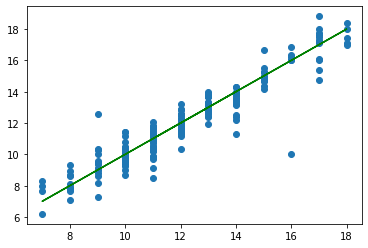

In [136]:
plt.scatter(y_test,predict_val)
plt.plot(y_test,y_test,"g")

In [138]:
df["G3"].iloc[55]

9

In [150]:
try_pred = df.drop("G3",axis=1).iloc[55]
try_pred.shape

(15,)

In [151]:
try_pred = scaler.transform(try_pred.values.reshape(-1,15))
model.predict(try_pred)

1/1 [==============================] - 0s 60ms/step


array([[9.434157]], dtype=float32)